# Integrated Customer Analysis

## Objective
To understand customer behavior, credit characteristics, and demographic patterns in a unified view, we merge the cleaned:

- Customers table
- Credit Profiles table
- Transactions table

This merged dataset is used only for exploratory analysis and visualization.

For modeling, transactions will later be aggregated at the customer level.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from src.data_loader import DataLoader
from src.preprocessors.customer_preprocessor import CustomerPreprocessor
from src.preprocessors.credit_preprocessor import CreditPreprocessor
from src.preprocessors.transaction_preprocessor import TransactionPreprocessor

# Load
loader = DataLoader()
customers = loader.load_table("customers")
credit_profiles = loader.load_table("credit_profiles")
transactions = loader.load_table("transactions")

# Preprocess
customers = CustomerPreprocessor().preprocess(customers)
credit_profiles = CreditPreprocessor().preprocess(credit_profiles)
transactions = TransactionPreprocessor().preprocess(transactions)

# Merge
merged_df = (
    transactions
    .merge(customers, on="cust_id", how="left")
    .merge(credit_profiles, on="cust_id", how="left")
)

merged_df.shape


customers loaded successfully. shape: (1000, 8)
credit_profiles loaded successfully. shape: (1004, 6)
transactions loaded successfully. shape: (500000, 7)


(500000, 21)

## Merge Strategy

- Transactions are left-joined with Customers and Credit Profiles using `cust_id`.
- A left join ensures that all transaction records are preserved.
- Customer and credit attributes are attached to each transaction.

The merged dataset allows cross-dimensional analysis across:

- Demographics
- Credit behavior
- Spending behavior


In [2]:
merged_df.isnull().sum()

tran_id                           0
cust_id                           0
tran_date                         0
tran_amount                       0
platform                          0
product_category                  0
payment_type                      0
name                              0
gender                            0
age                               0
location                          0
occupation                        0
annual_income                     0
marital_status                    0
age_group                         0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

## Correlation Analysis: Credit & Income Variables

### Objective
To understand relationships between key financial variables, a correlation analysis was performed on:

- Credit Score
- Credit Utilisation
- Outstanding Debt
- Credit Limit
- Annual Income

### Key Observations

- **Credit Score & Credit Limit (0.85)**
  Strong positive correlation, indicating higher credit scores are associated with higher credit limits.

- **Credit Score & Outstanding Debt (0.68)**
  Moderate-to-strong positive relationship, suggesting higher-scoring customers tend to manage larger credit exposure.

- **Credit Limit & Outstanding Debt (0.81)**
  Strong correlation, which is expected since higher limits enable higher spending capacity.

- **Annual Income & Credit Limit (0.68)**
  Higher income customers generally receive higher credit limits.

- **Credit Utilisation** shows weak correlation with most variables, suggesting utilisation reflects short-term behavior rather than structural financial capacity.

### Business Insight

Credit score and annual income are strong structural drivers of credit limit allocation.

This suggests that targeting higher-income, higher-credit-score segments may be optimal for premium credit card offerings.


In [3]:
numeric_columns = ["credit_score","credit_utilisation","outstanding_debt","credit_limit","annual_income"]
correlation_metrix = merged_df[numeric_columns].corr()
correlation_metrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income
credit_score,1.000000,-0.039843,0.680887,0.848130,0.576989
credit_utilisation,-0.039843,1.000000,0.342390,-0.043875,-0.030286
outstanding_debt,0.680887,0.342390,1.000000,0.810755,0.555906
credit_limit,0.848130,-0.043875,0.810755,1.000000,0.685961
annual_income,0.576989,-0.030286,0.555906,0.685961,1.000000


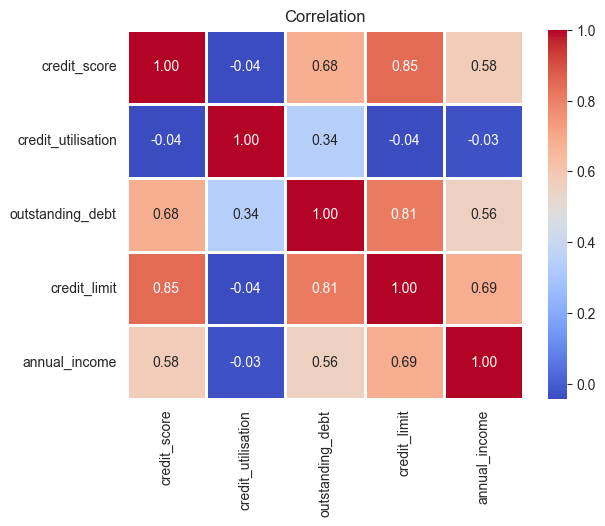

In [4]:
sns.heatmap(correlation_metrix, annot=True, fmt=".2f", cmap="coolwarm",linewidths=0.8)
plt.title("Correlation")
plt.show()

## Distribution of Payment Type by Age Group

### Objective
To understand payment preferences across different age segments, we analyzed transaction counts by `age_group` and `payment_type`.

### Key Observations

- The 26–48 age group shows the highest transaction volume across all payment types.
- Credit Card usage is significantly dominant in the 26–48 and 49–65 segments.
- Younger customers (18–25) prefer digital payment methods such as PhonePe and GPay over traditional card payments.
- Cash usage remains minimal across all age groups.

### Business Insight

The 26–48 age group represents the most financially active segment, with strong credit card adoption.
This segment may be the primary target market for premium credit card offerings.

Younger customers demonstrate strong digital payment behavior, indicating potential for entry-level or digital-first credit products.


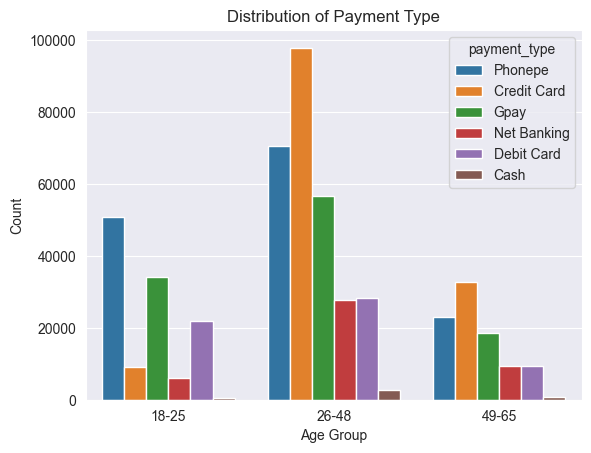

In [5]:
sns.countplot(data = merged_df, x="age_group", hue="payment_type")
plt.title("Distribution of Payment Type")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

## Product Category and Platform Analysis by Age Group

### Key Observations

- The 26–48 age group has the highest transaction activity across all product categories and platforms.
- Electronics and Fashion are the most popular product categories.
- Younger customers (18–25) actively purchase Fashion and Electronics.
- Amazon is the most used platform across all age groups.
- Platform usage is strongest in the 26–48 segment.

### Business Insight

The 26–48 age group is the most active and valuable customer segment.
They show high purchasing behavior and strong platform engagement, making them the primary target for credit card marketing strategies.


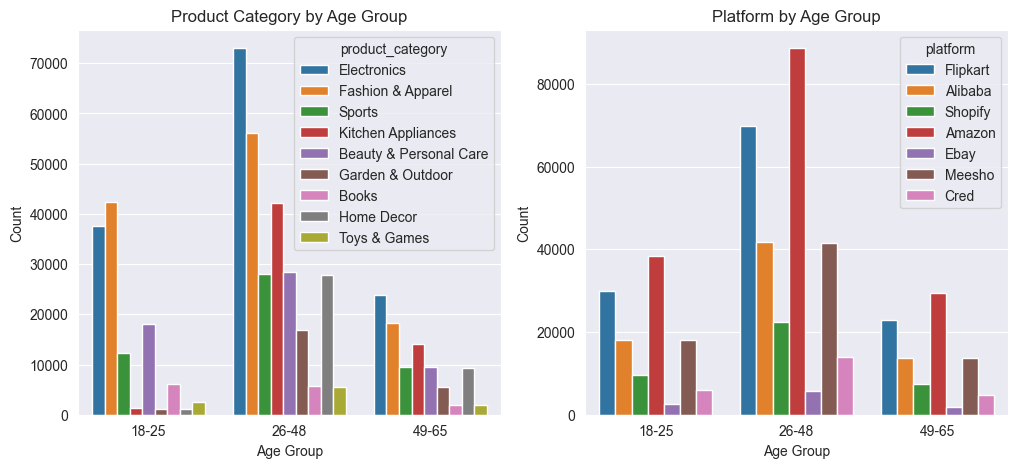

In [6]:
fig,(ax1, ax2) =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = merged_df, x="age_group", hue="product_category", ax=ax1)
ax1.set_title("Product Category by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
sns.countplot(data = merged_df, x="age_group", hue="platform", ax=ax2)
ax2.set_title("Platform by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
plt.show()

## Average Transaction Amount Analysis

### Objective
To understand spending intensity across demographic and behavioral segments, average transaction amounts were analyzed by:

- Age Group
- Product Category
- Marital Status
- Payment Type
- Platform

---

### Key Observations

- The 26–48 and 49–65 age groups show slightly higher average transaction amounts compared to the 18–25 segment.
- Electronics has the highest average transaction value among all product categories.
- Home Decor and Sports also show relatively higher spending compared to categories like Books and Toys.
- Married and Single customers show nearly similar spending patterns.
- Credit Card transactions have the highest average transaction amount, while Cash transactions are significantly lower.
- Platform-wise, average transaction amounts are relatively consistent, with Amazon slightly leading.

---

### Business Insight

Spending intensity is driven more by product category and payment type than by marital status or platform.

Electronics emerges as a high-value category, and credit card users tend to make higher-value transactions.

This suggests strong potential for category-based rewards and premium card targeting focused on high-value segments.


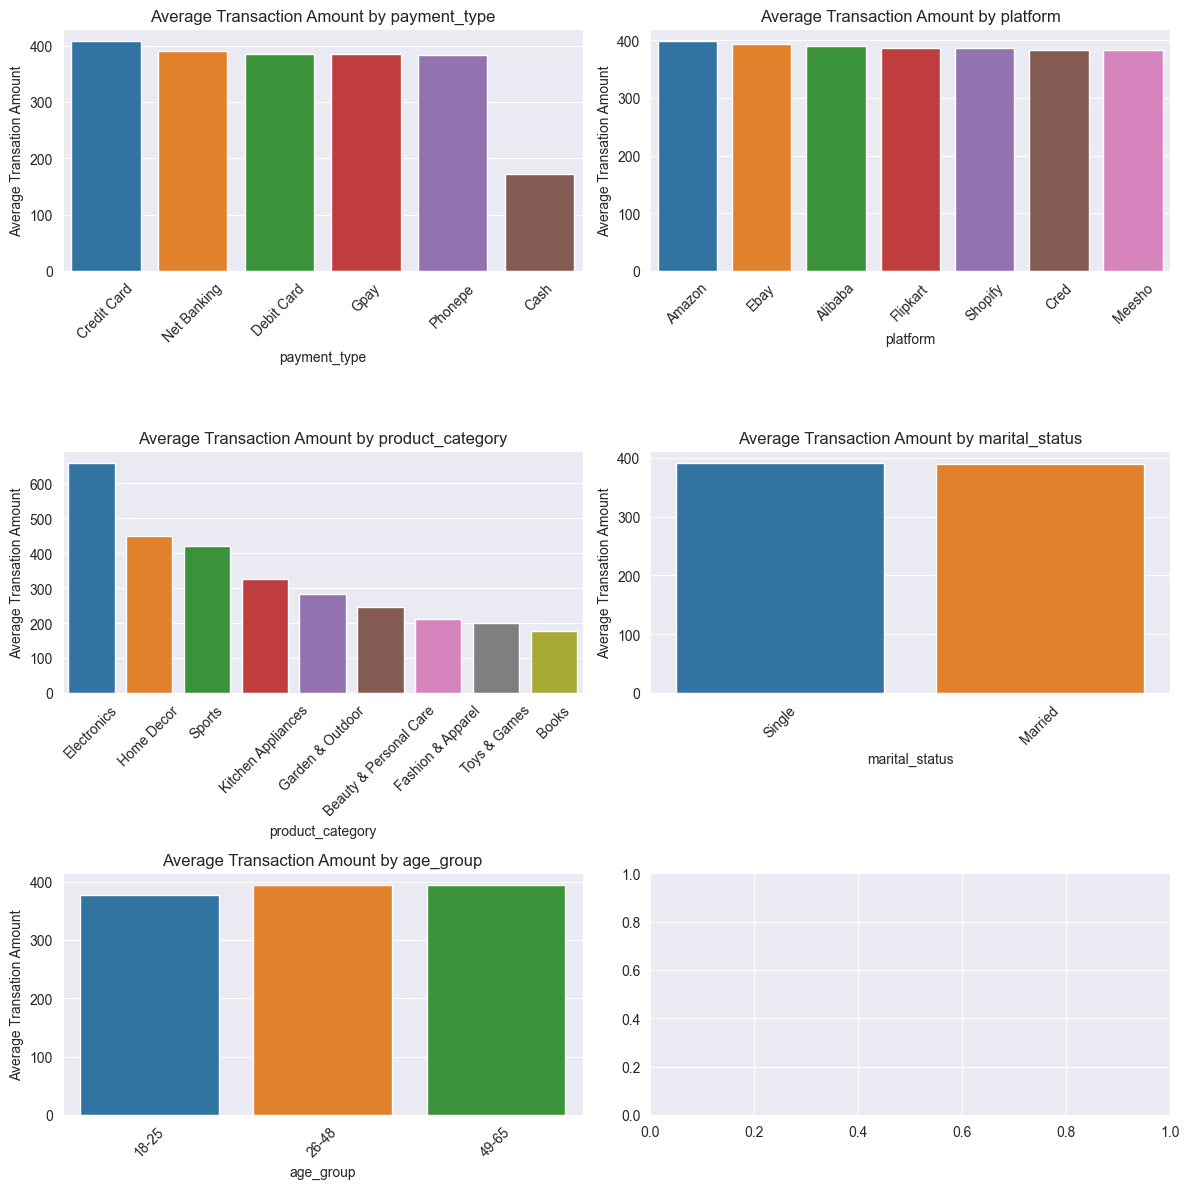

In [7]:
cat_columns =["payment_type","platform","product_category","marital_status","age_group"]
num_rows = 3
fig, axes =plt.subplots(num_rows, 2, figsize=(12,4*num_rows))

axes = axes.flatten()

for i, cat_columns in enumerate(cat_columns):
    avg_tran_amount_category = merged_df.groupby(cat_columns)["tran_amount"].mean().reset_index()
    sorted_data = avg_tran_amount_category.sort_values(by="tran_amount", ascending=False)
    sns.barplot(x=cat_columns,y="tran_amount", data= sorted_data, ci =None, ax=axes[i], palette ="tab10")
    axes[i].set_title(f"Average Transaction Amount by {cat_columns}")
    axes[i].set_xlabel(cat_columns)
    axes[i].set_ylabel("Average Transation Amount")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation =45)
for i in range(len(cat_columns),len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## Financial Strength Analysis by Age Group

### Objective
To evaluate financial capacity and creditworthiness across age segments, we analyzed:

- Average Annual Income
- Average Credit Limit
- Average Credit Score

---

### Key Observations

- Financial metrics increase consistently with age.
- The 49–65 age group shows the highest:
  - Annual Income
  - Credit Limit
  - Credit Score
- The 26–48 segment shows moderate-to-strong financial stability.
- The 18–25 group has the lowest income, credit limit, and credit score levels.

---

### Business Insight

Older customers (49–65) demonstrate the strongest financial profile and highest creditworthiness.

The 26–48 segment represents a balanced combination of:
- High transaction activity
- Strong credit score
- Growing income potential

This segment may offer the best mix of profitability and scalability for a new credit card launch.


In [8]:
age_metrix = merged_df.groupby("age_group")[["annual_income","credit_limit","credit_score"]].mean().reset_index()
age_metrix

,age_group,annual_income,credit_limit,credit_score
0,18-25,37176.064343,1137.024545,484.708344
1,26-48,146220.091842,20610.301607,597.918043
2,49-65,260613.917115,41781.734465,701.876810


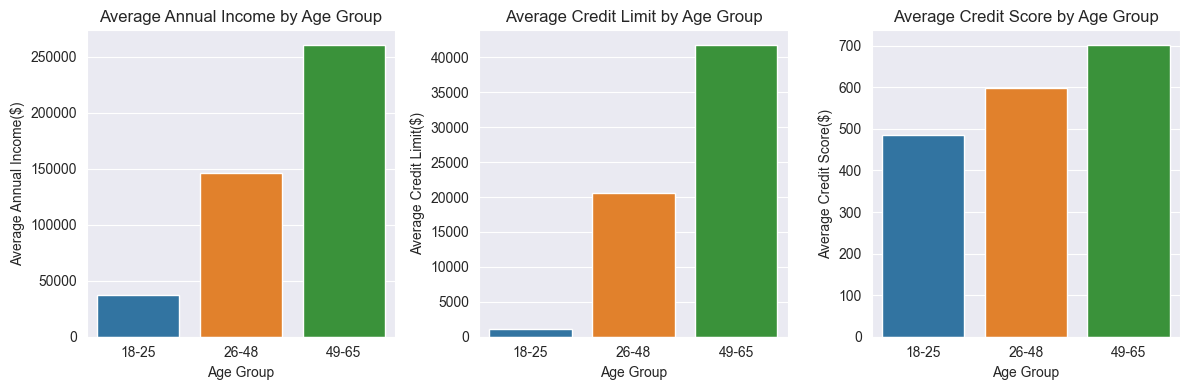

In [9]:
fig, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(12,4))

sns.barplot(data=age_metrix, x="age_group", y="annual_income", palette="tab10", ax=ax1)
ax1.set_title("Average Annual Income by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Average Annual Income($)")
ax1.tick_params(axis="x", rotation=0)

sns.barplot(data=age_metrix, x="age_group", y="credit_limit", palette="tab10", ax=ax2)
ax2.set_title("Average Credit Limit by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Average Credit Limit($)")
ax2.tick_params(axis="x", rotation=0)

sns.barplot(data=age_metrix, x="age_group", y="credit_score", palette="tab10", ax=ax3)
ax3.set_title("Average Credit Score by Age Group")
ax3.set_xlabel("Age Group")
ax3.set_ylabel("Average Credit Score($)")
ax3.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

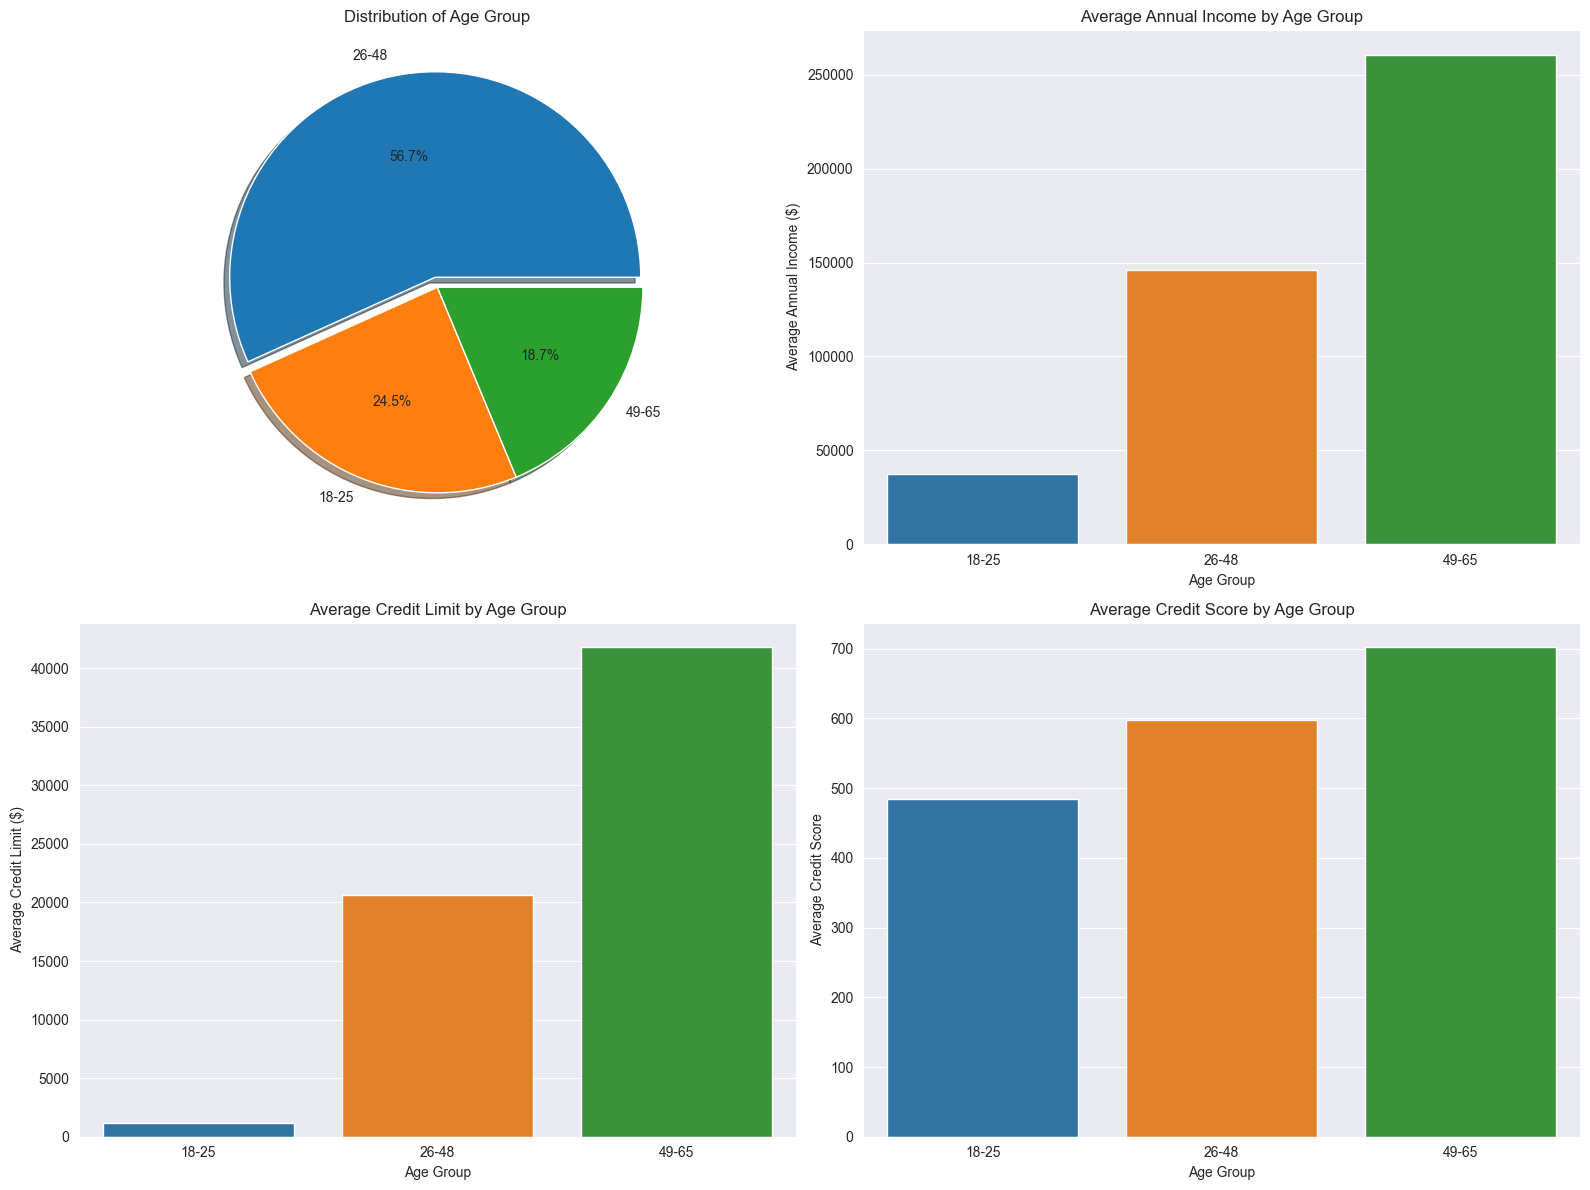

Saved as: credit_analysis_dashboard.png


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
age_group_per_count =merged_df["age_group"].value_counts(normalize=True)*100

# Create single figure with 4 subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# -----------------------------
# 1️⃣ Pie Chart - Age Group Distribution
# -----------------------------
explode = [0.05] + [0] * (len(age_group_per_count) - 1)

axes[0, 0].pie(
    age_group_per_count,
    labels=age_group_per_count.index,
    autopct="%1.1f%%",
    shadow=True,
    explode=explode
)

axes[0, 0].set_title("Distribution of Age Group")

# -----------------------------
# 2️⃣ Bar Chart - Average Annual Income
# -----------------------------
sns.barplot(
    data=age_metrix,
    x="age_group",
    y="annual_income",
    palette="tab10",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Average Annual Income by Age Group")
axes[0, 1].set_xlabel("Age Group")
axes[0, 1].set_ylabel("Average Annual Income ($)")
axes[0, 1].tick_params(axis="x", rotation=0)

# -----------------------------
# 3️⃣ Bar Chart - Average Credit Limit
# -----------------------------
sns.barplot(
    data=age_metrix,
    x="age_group",
    y="credit_limit",
    palette="tab10",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Average Credit Limit by Age Group")
axes[1, 0].set_xlabel("Age Group")
axes[1, 0].set_ylabel("Average Credit Limit ($)")
axes[1, 0].tick_params(axis="x", rotation=0)

# -----------------------------
# 4️⃣ Bar Chart - Average Credit Score
# -----------------------------
sns.barplot(
    data=age_metrix,
    x="age_group",
    y="credit_score",
    palette="tab10",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Average Credit Score by Age Group")
axes[1, 1].set_xlabel("Age Group")
axes[1, 1].set_ylabel("Average Credit Score")
axes[1, 1].tick_params(axis="x", rotation=0)

# Adjust layout
plt.tight_layout()

# -----------------------------
# Save as Single Image
# -----------------------------
plt.savefig("credit_analysis_dashboard.png", dpi=300)

plt.show()

print("Saved as: credit_analysis_dashboard.png")


# Final Conclusion – Target Market Identification

## Summary

After analysing customer demographics, credit profiles, and transaction behaviour, the 18–25 age group has been identified as the most strategic target segment for AtliQo’s new credit card launch.

## Key Findings

- The 18–25 age group shows strong digital payment adoption.
- This segment demonstrates growing transaction activity.
- Credit card penetration is relatively lower, indicating untapped market potential.
- Younger customers are highly engaged in online shopping, electronics, and digital transactions.

## Recommendation

The 18–25 age group should be selected as the primary target market due to:

- High future lifetime value
- Strong digital behaviour
- Opportunity to build early brand loyalty
- Long-term customer growth potential

This strategy positions AtliQo to capture young customers early and maximize long-term profitability.
